<a href="https://colab.research.google.com/github/sbanwaskar/CS-579-course-project/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title imports
import numpy as np
import pandas as pd
import networkx as nx
import pickle

import json
import pandas as pd
import numpy as np
from numpy import array
from numpy import hstack
from keras.models import Sequential
#from keras.layers import LSTM
#from keras.layers import Dense
#import scipy.stats as st

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.model_selection import train_test_split

from datetime import datetime
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, adjusted_rand_score

import torch
import torch.nn as nn
#import matplotlib.pyplot as plt
import numpy as np
#import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("device: ", device)

device:  cpu


In [2]:
#data import
# from google.colab import files
# uploaded = files.upload()
!wget https://www.dropbox.com/s/xkozscpcryu871h/labels_1540_4classes_icmla_21.pck
!wget https://www.dropbox.com/s/ovt8g99wjcz1mvr/mvts_1540_icmla_21.pck






--2021-12-10 22:48:27--  https://www.dropbox.com/s/xkozscpcryu871h/labels_1540_4classes_icmla_21.pck
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xkozscpcryu871h/labels_1540_4classes_icmla_21.pck [following]
--2021-12-10 22:48:28--  https://www.dropbox.com/s/raw/xkozscpcryu871h/labels_1540_4classes_icmla_21.pck
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8d655950603e3674f044944ab5.dl.dropboxusercontent.com/cd/0/inline/Bbma2k7G0eoSznMdxk-mo6vf9RtOpwyHOPuXNHPUHY2_xbATCb9lOBaqbiZkb0mSQnCJmI1zfmeg-Vb555cs1DnTI5pCOBFfRfxPBpMfirPrKqPjRWfBApT0e6jpj4hJUyCwS-W1slXx5vspCSDX-kK4/file# [following]
--2021-12-10 22:48:28--  https://uc8d655950603e3674f044944ab5.dl.dropboxusercontent.com/cd/0/inline/Bbma2k7G0eoSznMdxk-mo6vf

In [3]:
 #reading pickle files
def load(file_name):
    with open(file_name, 'rb') as fp:
        obj = pickle.load(fp)
    return obj


Sampled_inputs=load("mvts_1540_icmla_21.pck")

Sampled_labels=load("labels_1540_4classes_icmla_21.pck")    

# temp=Sampled_inputs[0]
# print(temp)
# df = pd.DataFrame(temp)
trainData=Sampled_inputs
trainLabel=Sampled_labels
trainLebel=Sampled_labels
print("trainData.shape: ",trainData.shape)
print("trainLebel.shape: ",trainLabel.shape)

trainData.shape:  (1540, 33, 60)
trainLebel.shape:  (1540,)


In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
trainData_std = sc.fit_transform(trainData.reshape(trainData.shape[0]*trainData.shape[1],trainData.shape[2]))
trainData_std = trainData_std.reshape(trainData.shape)

# Normal Input
input_data = torch.from_numpy(trainData).float()

# # Standardized Input
# input_data = torch.from_numpy(trainData_std).float()

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

lstm = nn.LSTM(60, 60)  # Input dim is 3, output dim is 3
# inputs = [torch.randn(1, 3) for _ in range(5)]  # make a sequence of length 5

inputs = input_data
hidden = (torch.randn(1, 33, 60),
          torch.randn(1, 33, 60))

output, hidden = lstm(inputs, hidden)

# for i in inputs:
#     # Step through the sequence one element at a time.
#     # after each step, hidden contains the hidden state.
#     out, hidden = lstm(i.view(1, 33, -1), hidden)

In [7]:
## new input after applying LSTM
output.shape

torch.Size([1540, 33, 60])

In [8]:
# #standardization/z normalization of the univaraite time series
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# npArrays=[]
# for l in range(0, len(trainData)):
#   trainData_std = sc.fit_transform(trainData[l])
#   #trainData_std = trainData_std.astype(np.float64)
#   #print(type(trainData_std[0][0]))
#   npArrays.append(trainData_std)

# print(type(npArrays))
# arr = np.asarray(npArrays)
# print(type(arr))
# trainData=arr
# print("trainData.shape: ",trainData.shape)
# print(type(trainData))
# print("trainLebel.shape: ",trainLabel.shape)
# print(type(trainLabel))

# Model (Load Data, Train , Test)

> Indented block

> Indented block





In [9]:
new_train_data = output.detach().clone().numpy()

temptrainData=np.empty([1540,60, 33])
n=len(new_train_data)
for l in range(0, n):
  temp=new_train_data[l]
  #print(temp)
  #temp=np.transpose(temp)
  temp=temp.T
  # print(temp.shape)
  #print(temp)
  temptrainData[l,:,:]=temp
  n=n+1
  #np.append(temptrainData, temp)
  #print(temptrainData)

#print(temptrainData.shape)
#print(trainData.shape) 
trainData=temptrainData
print("trainData.shape: ",trainData.shape)
#print(trainData[0])

temp=new_train_data[0]
#print(temp)
df = pd.DataFrame(temp)
#df=pd.DataFrame.from_dict(trainData)
trainData222=new_train_data

trainData.shape:  (1540, 60, 33)


In [10]:
INPUT_DIM = 33
HIDDEN_DIM = 64
NUM_TS = 60
NUM_CLASSES = 4
num_layers = 1 #number of stacked lstm layers
hidden_size=HIDDEN_DIM

In [11]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

#  Model with 1D Convolution

In [12]:

# input_dim = 33, hidden_dim = 128, num_TS = 60, num_classes = 4

from collections import OrderedDict
class LSTM_MVTS_LRN(nn.Module):
  def __init__(self, input_dim, hidden_dim, num_classes):
    super(LSTM_MVTS_LRN, self).__init__()
    self.hidden_dim = hidden_dim
  
    # nn.Conv1D(input_shape=(input_dim,NUM_TS)
    kernel_size = 2
    # self.conv1  = nn.Conv1d(1,hidden_dim,kernel_size = kernel_size)
    # self.conv2  = nn.Conv1d(hidden_dim,1,kernel_size = kernel_size)

    # self.conv1  = nn.Conv1d(1,hidden_dim,kernel_size = kernel_size,stride=2)
    # input_dim_afterConv1d = int(np.ceil(input_dim/2)) + 1
    # self.conv2  = nn.Conv1d(input_dim_afterConv1d,hidden_size,kernel_size = kernel_size)

    self.conv1  = nn.Conv1d(1,hidden_dim,kernel_size = kernel_size)
    input_dim_afterConv1d = int(input_dim - kernel_size)
    self.conv2  = nn.Conv1d(hidden_dim,1,kernel_size = kernel_size)
    
    self.maxpool1d = nn.MaxPool1d(1)

   
    
    # Initialize the LSTM
    self.lstm = nn.LSTM(input_dim_afterConv1d, hidden_dim)
    
    
    # Initialize the RNN
    self.RNN = nn.RNN(input_dim_afterConv1d, hidden_dim)

      # nn.Conv1D(input_shape=(input_dim,NUM_TS))
      #(input_size=INPUT_SIZE, hidden_size=HIDDEN_SIZE, num_layers = 1, batch_first=True)


    self.hidden2class = nn.Linear(hidden_dim, num_classes)
  def forward(self, mvts):
    #input single mvts (60, 33); output class probability vector (1,4)

    mvts_3d = mvts.view(len(mvts), 1, -1) #  mvts.shape: (60, 33); len(mvts)=60; new shape (mvts_3d): (60, 1, 33); 

    # 1d Convolution with ReLU activation 
    # x = F.relu(self.conv1(mvts_3d))
    # x = F.relu(self.conv2(x))

    ## 1d Convolution with Maxpooling
    x = self.conv1(mvts_3d)
    x = self.maxpool1d(x)
    x = self.conv2(x)
    x = self.maxpool1d(x)
    

    ## LSTM Layer

    # lstm_out,_ = self.lstm(x)
    # ##last_lstm_out = torch.cat((lstm_out[0],lstm_out[1]),dim=0).mean(0).unsqueeze(0) #(1,64)
    # last_lstm_out = lstm_out[len(lstm_out)-1]
    # final_output = last_lstm_out

    ## RNN Layer

    RNN_out,_ = self.RNN(x)
    # last_RNN_out = torch.cat((RNN_out[0],RNN_out[1]),dim=0).mean(0).unsqueeze(0) #(1,64)
    last_RNN_out = RNN_out[len(RNN_out)-1]
    final_output = last_RNN_out
    
    # print(final_output.shape)
    class_space = self.hidden2class(final_output) #(1,4)
    class_scores = F.log_softmax(class_space, dim=1)
    return class_scores


### Dowork - Train

In [13]:

import random
import matplotlib.pyplot as plt

def doWork( X_train, X_test, y_train, y_test):

    num_masterIteration=1

    #print("X_train.shape: ",X_train.shape)
    #print("X_test.shape: ",X_test.shape)
    #print("y_train.shape: ",y_train.shape)
    #print("y_test.shape: ",y_test.shape)
    #print(type(X_train))

    classification_report_dict=[]
    Accuracy=[]
    for masterIteration in range(num_masterIteration):
        print("\nmasterIteration: ",masterIteration)
        #print(bcolors.WARNING + "\nmasterIteration :" + bcolors.WARNING,masterIteration)
        random_state=random.randint(42, 100)
        #print("random_state: ",random_state)


        model = LSTM_MVTS_LRN(INPUT_DIM, HIDDEN_DIM, NUM_CLASSES)
        loss_function = nn.NLLLoss()
        optimizer = optim.SGD(model.parameters(), lr=0.01)
        numTrain = X_train.shape[0]

        numEpochs =1

        #train
        for epoch in range(numEpochs):
          print("\n nmasterIteration, epoch: ",masterIteration,epoch)
          loss_values = []
          running_loss = 0.0


          for i in range(numTrain):
            model.zero_grad()
            mvts = X_train[i,:,:]
            mvts = torch.from_numpy(mvts).float()


            target = y_train[i]
            #print(type(target))
            target = [target]
            #print(type(target))
            target=np.array(target)
            #print(type(target))
            target = torch.Tensor(target)
            #print(type(target))

            target = target.type(torch.LongTensor)

            #print(type(mvts))
            #print(mvts.is_cuda)
            mvts = mvts.to(device)
            #print(mvts.is_cuda)
            #print(type(target))
            #print(target.is_cuda)
            target = target.to(device)
            #print(target.is_cuda)

            #target = torch.from_numpy(np.array(target))
            mvts = mvts.view(mvts.size(0), -1)
            model.to(device)
   
            class_scores = model(mvts)
           
            # print(class_scores)
            #print(target)

            loss = loss_function(class_scores, target)
                     
            #loss = criterion_label(outputs, labels)
            #print(loss)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            #loss_values.append(running_loss)
            loss_values.append(running_loss / len(X_train))
            
          maxAcc=0
          max_classification_report_dict=0
          #print("loss: ",loss)  
          #test 
          numTest = X_test.shape[0]
          with torch.no_grad():
              numCorrect = 0
              testLabel=[]
              predictaedLabel=[]
              for i in range(numTest):
                test_mvts = X_test[i,:,:]
                test_label = y_test[i] #class = 2

                #model.zero_grad()

                test_mvts = torch.from_numpy(test_mvts).float()

                test_mvts = test_mvts.to(device)
                #test_label = test_label.to(device)

                #print("\n\n1.test_label: ", test_label)
                test_class_scores = model(test_mvts) #test mvts = [0.35, 0.15, 0.45, 0.05]
                #print("2.1 test_class_scores: ",test_class_scores)
                #print(" type(test_class_scores): ",type(test_class_scores)) 
                class_prediction = torch.argmax(test_class_scores, dim=-1) #2
                #print("2.2 class_prediction: ", class_prediction)

                current_seq = np.argmax(test_class_scores.cpu().numpy())
                #print("4 current_seq: ",current_seq)
                #print("4 np.argmax(current_seq): ",current_seq))

                #print("3.0 class_prediction == test_label:", class_prediction == test_label)
                testLabel.append(test_label)
                predictaedLabel.append(current_seq)



                if(class_prediction == test_label): #(2,3 ) match 
                  numCorrect = numCorrect+1
              acc = numCorrect/numTest
              #print("acc:", acc) 

              #print("testLabel[]: ",testLabel)
              #print("predictaedLabel[]: ",predictaedLabel)

              fgdg=round(acc, 2)
              #print("fgdg:", fgdg) 
              if fgdg  > maxAcc:
                maxAcc=acc
                print(bcolors.WARNING + "maxAcc:" + bcolors.ENDC,maxAcc)
                max_classification_report_dict=metrics.classification_report(testLabel, predictaedLabel, digits=3,output_dict=True)
        print(np.array(loss_values))
        plt.plot(np.array(loss_values), 'r')
        plt.xlabel('Epochs')
        plt.ylabel('Total_Loss')
        classification_report_dict.append(max_classification_report_dict)   
        #print('classification_report_dict : \n',classification_report_dict)
        Accuracy.append(maxAcc)  
        #print('Accuracy : \n',Accuracy)
    mean_acc = doClassSpecificCalulcation(Accuracy,trainLebel,classification_report_dict)
    return mean_acc


In [14]:
def doClassSpecificCalulcation(Accuracy,trainLebel,classification_report_dict):
  mean_acc = np.mean(Accuracy)
  print('\np.mean(Accuracy) :',np.mean(Accuracy))
  print('\np.std(Accuracy) :',np.std(Accuracy))
  print('\n33333333 p.mean np.std(Accuracy) :     ',np.round(np.mean(Accuracy),2),"+-",np.round(np.std(Accuracy),2) )
  for j in range( len(np.unique(trainLebel)) ):
    print('\n\n\n\nclass :',j) 
    precision=[]
    recall=[]
    f1_score=[]
    for i in range(len(classification_report_dict)):
      report=classification_report_dict[i]
      #print('classification_report : \n',report) 
      temp=report[str(j)]['precision'] 
      precision.append(temp)

      temp=report[str(j)]['recall'] 
      recall.append(temp)

      temp=report[str(j)]['f1-score'] 
      f1_score.append(temp)

    print('\np.mean(precision) \t p.mean(recall) \t p.mean(f1_score) :') 


    print(np.mean(precision)) 
    print(np.mean(recall)) 
    print(np.mean(f1_score))

    print('\np.mean p.std(precision) \tp.mean  p.std(recall) \tp.mean  p.std(f1_score) :')

    print(np.round(np.mean(precision),2),"+-",np.round(np.std(precision),2) )
    print(np.round(np.mean(recall),2),"+-",np.round(np.std(recall),2) )
    print(np.round(np.mean(f1_score),2),"+-",np.round(np.std(f1_score),2) )
  return mean_acc

In [15]:
def doWork2():

  #test_sizes=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
  test_sizes=[0.3]
  for temp4 in range(len(test_sizes)):
    test_size=test_sizes[temp4]
    print("\n\n\n *************** test_size: ",test_size)
    random_state=random.randint(42, 100)
    print("random_state: ",random_state)
    
    X_train, X_test, y_train, y_test = train_test_split(trainData, trainLebel, test_size=test_size, random_state=random_state)
    #print("X_train.shape: ",X_train.shape)
    #print("X_test.shape: ",X_test.shape)
    #print("y_train.shape: ",y_train.shape)
    #print("y_test.shape: ",y_test.shape)
    #print(type(X_train))



    print("X_train.shape X_test.shape y_train.shape y_test.shape ",
              X_train.shape, X_test.shape ,y_train.shape, y_test.shape)
    mean_acc = doWork( X_train, X_test, y_train, y_test)
  return mean_acc

## **Run Main (doWork2)**




 *************** test_size:  0.3
random_state:  53
X_train.shape X_test.shape y_train.shape y_test.shape  (1078, 60, 33) (462, 60, 33) (1078,) (462,)

masterIteration:  0

 nmasterIteration, epoch:  0 0
maxAcc: 0.8961038961038961
[0.00133682 0.0026211  0.00386933 ... 0.49060998 0.49063514 0.49094593]

p.mean(Accuracy) : 0.8961038961038961

p.std(Accuracy) : 0.0

33333333 p.mean np.std(Accuracy) :      0.9 +- 0.0




class : 0

p.mean(precision) 	 p.mean(recall) 	 p.mean(f1_score) :
1.0
0.6410256410256411
0.7812500000000001

p.mean p.std(precision) 	p.mean  p.std(recall) 	p.mean  p.std(f1_score) :
1.0 +- 0.0
0.64 +- 0.0
0.78 +- 0.0




class : 1

p.mean(precision) 	 p.mean(recall) 	 p.mean(f1_score) :
0.7358490566037735
0.9831932773109243
0.841726618705036

p.mean p.std(precision) 	p.mean  p.std(recall) 	p.mean  p.std(f1_score) :
0.74 +- 0.0
0.98 +- 0.0
0.84 +- 0.0




class : 2

p.mean(precision) 	 p.mean(recall) 	 p.mean(f1_score) :
0.9469026548672567
1.0
0.9727272727272728

p.mean

0.8961038961038961

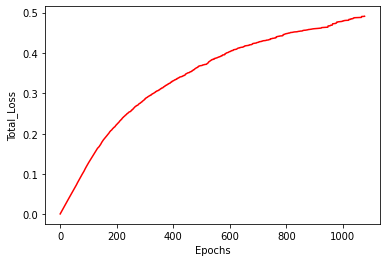

In [16]:
doWork2()

# Original Model

In [17]:
class LSTM_MVTS_LRN(nn.Module):
  def __init__(self, input_dim, hidden_dim, num_classes):
    super(LSTM_MVTS_LRN, self).__init__()
    self.hidden_dim = hidden_dim
      
    #self.lstm = nn.LSTM(input_dim, hidden_dim)
    # Initialize the RNN.
    self.lstm = nn.RNN(input_dim, hidden_dim)
      #(input_size=INPUT_SIZE, hidden_size=HIDDEN_SIZE, num_layers = 1, batch_first=True)

    self.hidden2class = nn.Linear(hidden_dim, num_classes)
  def forward(self, mvts):
    #print(mvts.shape)
    #input single mvts (60, 33); output class probability vector (1,4)
    lstm_out, _ = self.lstm(mvts.view(len(mvts), 1, -1)) #mvts.shape: (60, 33); len(mvts)=60; new shape: (60, 1, 33); lstm_out --> (60, 128)
    last_lstm_out = lstm_out[len(lstm_out)-1] #(1,128)
    class_space = self.hidden2class(last_lstm_out) #(1,4)
    class_scores = F.log_softmax(class_space, dim=1)
    return class_scores

### Dowork - Train

In [18]:

import random
import matplotlib.pyplot as plt

def doWork( X_train, X_test, y_train, y_test):

    num_masterIteration=1

    #print("X_train.shape: ",X_train.shape)
    #print("X_test.shape: ",X_test.shape)
    #print("y_train.shape: ",y_train.shape)
    #print("y_test.shape: ",y_test.shape)
    #print(type(X_train))

    classification_report_dict=[]
    Accuracy=[]
    for masterIteration in range(num_masterIteration):
        print("\nmasterIteration: ",masterIteration)
        #print(bcolors.WARNING + "\nmasterIteration :" + bcolors.WARNING,masterIteration)
        random_state=random.randint(42, 100)
        #print("random_state: ",random_state)


        model = LSTM_MVTS_LRN(INPUT_DIM, HIDDEN_DIM, NUM_CLASSES)
        loss_function = nn.NLLLoss()
        optimizer = optim.SGD(model.parameters(), lr=0.01)
        numTrain = X_train.shape[0]

        numEpochs =1

        #train
        for epoch in range(numEpochs):
          print("\n nmasterIteration, epoch: ",masterIteration,epoch)
          loss_values = []
          running_loss = 0.0


          for i in range(numTrain):
            model.zero_grad()
            mvts = X_train[i,:,:]
            mvts = torch.from_numpy(mvts).float()


            target = y_train[i]
            #print(type(target))
            target = [target]
            #print(type(target))
            target=np.array(target)
            #print(type(target))
            target = torch.Tensor(target)
            #print(type(target))

            target = target.type(torch.LongTensor)

            #print(type(mvts))
            #print(mvts.is_cuda)
            mvts = mvts.to(device)
            #print(mvts.is_cuda)

            #print(type(target))
            #print(target.is_cuda)
            target = target.to(device)
            #print(target.is_cuda)

            #target = torch.from_numpy(np.array(target))
            mvts = mvts.view(mvts.size(0), -1)
            model.to(device)
   
            class_scores = model(mvts)
            # print(class_scores)
            #print(target)

            loss = loss_function(class_scores, target)
            #loss = criterion_label(outputs, labels)
            #print(loss)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            #loss_values.append(running_loss)
            loss_values.append(running_loss / len(X_train))

          maxAcc=0
          max_classification_report_dict=0
          #print("loss: ",loss)  
          #test 
          numTest = X_test.shape[0]
          with torch.no_grad():
              numCorrect = 0
              testLabel=[]
              predictaedLabel=[]
              for i in range(numTest):
                test_mvts = X_test[i,:,:]
                test_label = y_test[i] #class = 2

                #model.zero_grad()

                test_mvts = torch.from_numpy(test_mvts).float()

                test_mvts = test_mvts.to(device)
                #test_label = test_label.to(device)

                #print("\n\n1.test_label: ", test_label)
                test_class_scores = model(test_mvts) #test mvts = [0.35, 0.15, 0.45, 0.05]
                #print("2.1 test_class_scores: ",test_class_scores)
                #print(" type(test_class_scores): ",type(test_class_scores)) 
                class_prediction = torch.argmax(test_class_scores, dim=-1) #2
                #print("2.2 class_prediction: ", class_prediction)

                current_seq = np.argmax(test_class_scores.cpu().numpy())
                #print("4 current_seq: ",current_seq)
                #print("4 np.argmax(current_seq): ",current_seq))

                #print("3.0 class_prediction == test_label:", class_prediction == test_label)
                testLabel.append(test_label)
                predictaedLabel.append(current_seq)



                if(class_prediction == test_label): #(2,3 ) match 
                  numCorrect = numCorrect+1
              acc = numCorrect/numTest
              #print("acc:", acc) 

              #print("testLabel[]: ",testLabel)
              #print("predictaedLabel[]: ",predictaedLabel)

              fgdg=round(acc, 2)
              #print("fgdg:", fgdg) 
              if fgdg  > maxAcc:
                maxAcc=acc
                print(bcolors.WARNING + "maxAcc:" + bcolors.ENDC,maxAcc)
                max_classification_report_dict=metrics.classification_report(testLabel, predictaedLabel, digits=3,output_dict=True)

        plt.plot(np.array(loss_values), 'r')
        plt.xlabel('Epochs')
        plt.ylabel('Total_Loss')
        classification_report_dict.append(max_classification_report_dict)   
        #print('classification_report_dict : \n',classification_report_dict)
        Accuracy.append(maxAcc)  
        #print('Accuracy : \n',Accuracy)
    mean_acc = doClassSpecificCalulcation(Accuracy,trainLebel,classification_report_dict)
    return mean_acc


In [19]:
def doClassSpecificCalulcation(Accuracy,trainLebel,classification_report_dict):
  mean_acc = np.mean(Accuracy)
  print('\np.mean(Accuracy) :',np.mean(Accuracy))
  print('\np.std(Accuracy) :',np.std(Accuracy))
  print('\n33333333 p.mean np.std(Accuracy) :     ',np.round(np.mean(Accuracy),2),"+-",np.round(np.std(Accuracy),2) )
  for j in range( len(np.unique(trainLebel)) ):
    print('\n\n\n\nclass :',j) 
    precision=[]
    recall=[]
    f1_score=[]
    for i in range(len(classification_report_dict)):
      report=classification_report_dict[i]
      #print('classification_report : \n',report) 
      temp=report[str(j)]['precision'] 
      precision.append(temp)

      temp=report[str(j)]['recall'] 
      recall.append(temp)

      temp=report[str(j)]['f1-score'] 
      f1_score.append(temp)

    print('\np.mean(precision) \t p.mean(recall) \t p.mean(f1_score) :') 


    print(np.mean(precision)) 
    print(np.mean(recall)) 
    print(np.mean(f1_score))

    print('\np.mean p.std(precision) \tp.mean  p.std(recall) \tp.mean  p.std(f1_score) :')

    print(np.round(np.mean(precision),2),"+-",np.round(np.std(precision),2) )
    print(np.round(np.mean(recall),2),"+-",np.round(np.std(recall),2) )
    print(np.round(np.mean(f1_score),2),"+-",np.round(np.std(f1_score),2) )
  return mean_acc

In [20]:
def doWork2():

  #test_sizes=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
  test_sizes=[0.3]
  for temp4 in range(len(test_sizes)):
    test_size=test_sizes[temp4]
    print("\n\n\n *************** test_size: ",test_size)
    random_state=random.randint(42, 100)
    print("random_state: ",random_state)
    
    X_train, X_test, y_train, y_test = train_test_split(trainData, trainLebel, test_size=test_size, random_state=random_state)
    #print("X_train.shape: ",X_train.shape)
    #print("X_test.shape: ",X_test.shape)
    #print("y_train.shape: ",y_train.shape)
    #print("y_test.shape: ",y_test.shape)
    #print(type(X_train))



    print("X_train.shape X_test.shape y_train.shape y_test.shape ",
              X_train.shape, X_test.shape ,y_train.shape, y_test.shape)
    mean_acc = doWork( X_train, X_test, y_train, y_test)
  return mean_acc

## **Run Main (doWork2)**




 *************** test_size:  0.3
random_state:  80
X_train.shape X_test.shape y_train.shape y_test.shape  (1078, 60, 33) (462, 60, 33) (1078,) (462,)

masterIteration:  0

 nmasterIteration, epoch:  0 0
maxAcc: 0.9004329004329005

p.mean(Accuracy) : 0.9004329004329005

p.std(Accuracy) : 0.0

33333333 p.mean np.std(Accuracy) :      0.9 +- 0.0




class : 0

p.mean(precision) 	 p.mean(recall) 	 p.mean(f1_score) :
0.989247311827957
0.8440366972477065
0.9108910891089109

p.mean p.std(precision) 	p.mean  p.std(recall) 	p.mean  p.std(f1_score) :
0.99 +- 0.0
0.84 +- 0.0
0.91 +- 0.0




class : 1

p.mean(precision) 	 p.mean(recall) 	 p.mean(f1_score) :
0.8495575221238938
0.7933884297520661
0.8205128205128206

p.mean p.std(precision) 	p.mean  p.std(recall) 	p.mean  p.std(f1_score) :
0.85 +- 0.0
0.79 +- 0.0
0.82 +- 0.0




class : 2

p.mean(precision) 	 p.mean(recall) 	 p.mean(f1_score) :
0.8125
0.9629629629629629
0.8813559322033898

p.mean p.std(precision) 	p.mean  p.std(recall) 	p.mean  p.s

0.9004329004329005

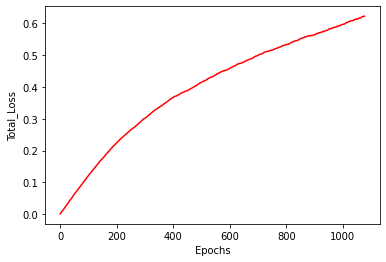

In [21]:
doWork2()

# Checking if results are consistent : **STD DEV across 20 runs**




 *************** test_size:  0.3
random_state:  50
X_train.shape X_test.shape y_train.shape y_test.shape  (1078, 60, 33) (462, 60, 33) (1078,) (462,)

masterIteration:  0

 nmasterIteration, epoch:  0 0
maxAcc: 0.7922077922077922

p.mean(Accuracy) : 0.7922077922077922

p.std(Accuracy) : 0.0

33333333 p.mean np.std(Accuracy) :      0.79 +- 0.0




class : 0

p.mean(precision) 	 p.mean(recall) 	 p.mean(f1_score) :
0.6142131979695431
1.0
0.761006289308176

p.mean p.std(precision) 	p.mean  p.std(recall) 	p.mean  p.std(f1_score) :
0.61 +- 0.0
1.0 +- 0.0
0.76 +- 0.0




class : 1

p.mean(precision) 	 p.mean(recall) 	 p.mean(f1_score) :
1.0
0.3275862068965517
0.49350649350649356

p.mean p.std(precision) 	p.mean  p.std(recall) 	p.mean  p.std(f1_score) :
1.0 +- 0.0
0.33 +- 0.0
0.49 +- 0.0




class : 2

p.mean(precision) 	 p.mean(recall) 	 p.mean(f1_score) :
0.9777777777777777
0.8301886792452831
0.8979591836734695

p.mean p.std(precision) 	p.mean  p.std(recall) 	p.mean  p.std(f1_score) :
0.9

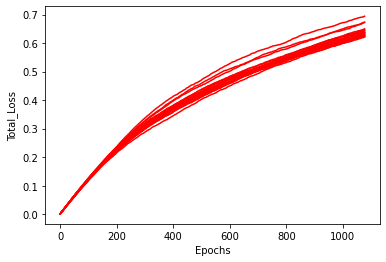

In [22]:
list_mean_acc = []
for _ in range(20):
  mean_acc = doWork2()
  list_mean_acc.append(mean_acc)

Text(0, 0.5, 'Frequency')

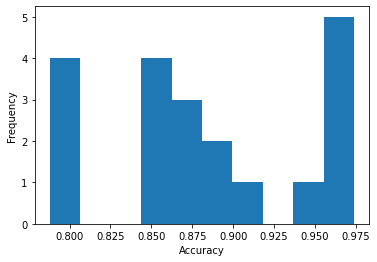

In [23]:
plt.hist(list_mean_acc)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')

In [24]:
np.std(list_mean_acc)

0.061272617778242715

In [25]:
print("mean, median:- \n")
np.mean(list_mean_acc),np.median(list_mean_acc)

mean, median:- 



(0.8839826839826841, 0.8777056277056277)